# Modelling - Transformed Data

## Import Cleaned Data

__DataFrames:__  
df_model - df with all the features (independent festures + Target)  
x - df with all independent features
y - df with dependent feature  
x_train - df with training data from x  
x_train_out - df with training data from x with outliers treatment applied  
x_test - df with test data from x  
x_test_out - df with test data from x with outliers treatment applied  



In [2]:
import sys
sys.path.insert(1, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions')
sys.path.insert(2, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions\Functions')
sys.path.insert(3, r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM')

import Visualizations_Functions as viz 
import Classification_CV as class_cv
import DataPreparation as preprocess 
import FeatureExtraction as ft_extract 
import DataScalling as scalling
import FeatureSelection as ft_selection
import importCleanedData as importData
import importCleanedData_Orig as importDataOrig
import importSubsets as subsets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from tensorflow import keras

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#set preferences
sns.set_style('whitegrid')

#set color for graphs
#set color for graphs
palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]

dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample'
df_model_skew,df_target = importData.importCleanedData(dir=dir,target='CAPM')

df_model, df_target =  importDataOrig.importCleanedData(dir=dir,target='CAPM')


#split data
date = '2018-01-01'
#split data without transformation
x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importData.splitData(df_model_skew, date) 

lasso_subset_0, lasso_ubset_15, mi_subset_0, mi_subset_15, lgb_subset, corr_subset0, corr_subset15 = subsets.importSubsets()

d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
d:\Rafael\Anaconda_Setup\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


CAPM
Import data from: C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample\LongTerm-DataPreparation_Skew.csv
Original CAPM is being used as Target
CAPM
Import data from: C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample\LongTerm-DataPreparation.csv
Original CAPM is being used as Target
Nr of rows:
72538


In [27]:
futDate = df_model_skew['futDate']
capm = df_model_skew['CAPM']

df_model_ = df_model_skew.drop(['futDate','CAPM','adjCAPM'],axis=1)

df_model_['CAPM'] = capm
df_model_['futDate'] = futDate 

In [29]:
name_df = f'{dir}\df_clean_skew.csv'
df_model_.to_csv(name_df)

## Final Subsets

In [2]:
subset_0 = ['revenue',
 'costOfRevenue',
 'otherExpenses',
 'interestIncome',
 'weightedAverageShsOut',
 'cashAndShortTermInvestments',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'goodwill',
 'intangibleAssets',
 'longTermInvestments',
 'otherAssets',
 'deferredRevenue',
 'otherCurrentLiabilities',
 'deferredRevenueNonCurrent',
 'totalNonCurrentLiabilities',
 'capitalLeaseObligations',
 'preferredStock',
 'totalInvestments',
 'netIncome_cf',
 'depreciationAndAmortization_cf',
 'deferredIncomeTax',
 'stockBasedCompensation',
 'inventory_cf',
 'netCashProvidedByOperatingActivities',
 'salesMaturitiesOfInvestments',
 'otherFinancingActivites',
 'effectOfForexChangesOnCash',
 'daysOfPayablesOutstanding',
 'netProfitMargin',
 'freeCashFlowPerShare',
 'capitalExpenditureCoverageRatio',
 'priceEarningsRatio',
 'close',
 'totalDividend',
 'operatingIncome_TTM',
 'eps_TTM',
 'YoY_ebitda',
 'YoY_operatingIncome',
 'YoY_eps']
subset_15 =  ['revenue',
 'costOfRevenue',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'interestIncome',
 'operatingIncome',
 'weightedAverageShsOut',
 'cashAndShortTermInvestments',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'goodwill',
 'taxAssets',
 'totalAssets',
 'accountPayables',
 'longTermDebt',
 'deferredRevenueNonCurrent',
 'deferredTaxLiabilitiesNonCurrent',
 'capitalLeaseObligations',
 'commonStock',
 'netIncome_cf',
 'depreciationAndAmortization_cf',
 'deferredIncomeTax',
 'commonStockIssued',
 'effectOfForexChangesOnCash',
 'freeCashFlow',
 'daysOfInventoryOutstanding',
 'daysOfPayablesOutstanding',
 'companyEquityMultiplier',
 'operatingCashFlowPerShare',
 'capitalExpenditureCoverageRatio',
 'priceEarningsRatio',
 'priceEarningsToGrowthRatio',
 'close',
 'totalDividend',
 'researchAndDevelopmentExpenses_TTM',
 'YoY_netIncome']


## Fit OLS to check coeficients

#### CAPM - Lasso - Target 0  

In [43]:
import statsmodels.api as sm
dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\OLS\\'
X = df_model_skew[lasso_subset_0]
y = df_model['CAPM']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
OLS_model = sm.OLS(y, X1)

# fit model and print results
results = OLS_model.fit()
print(results.summary())

summary_complete = results.summary()
summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS0_skew_CAPM_summary.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS0_skew_CAPM_results.csv')

significatFeatures = results.pvalues[results.pvalues<0.1].index
x = X[significatFeatures[1:]]

X1 = sm.add_constant(x)
OLS_model = sm.OLS(y, X1).fit()
summary_complete = OLS_model.summary()

summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS_skew_CAPM_summary.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS_skew_CAPM_results.csv')

                            OLS Regression Results                            
Dep. Variable:                   CAPM   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     29.33
Date:                Fri, 19 May 2023   Prob (F-statistic):          5.20e-218
Time:                        10:17:40   Log-Likelihood:                 22536.
No. Observations:               72538   AIC:                        -4.499e+04
Df Residuals:                   72497   BIC:                        -4.461e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### CAPM - MI - Target 0

In [53]:
import statsmodels.api as sm
dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\OLS\\'
X = df_model_skew[mi_subset_0]
y = df_model_skew['CAPM']

# Add a constant to the independent value
X1 = sm.add_constant(X)
X1['netIncome_bin'] = X1['netIncome_bin'].astype(int)

# make regression model 
OLS_model = sm.OLS(y, X1)

# fit model and print results
results = OLS_model.fit()
print(results.summary())

summary_complete = results.summary()
summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS0_skew_CAPM_summary_MI.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS0_skew_CAPM_results_MI.csv')

significatFeatures = results.pvalues[results.pvalues<0.1].index
x = X[significatFeatures[1:]]

X1 = sm.add_constant(x)
OLS_model = sm.OLS(y, X1).fit()
summary_complete = OLS_model.summary()

summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS_skew_CAPM_summary_MI.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS_skew_CAPM_results_MI.csv')

                            OLS Regression Results                            
Dep. Variable:                   CAPM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.637
Date:                Fri, 19 May 2023   Prob (F-statistic):           6.51e-22
Time:                        10:24:05   Log-Likelihood:                 22033.
No. Observations:               72538   AIC:                        -4.402e+04
Df Residuals:                   72513   BIC:                        -4.379e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### All Features - Lasso & MI

In [66]:
import statsmodels.api as sm
dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\OLS\\'
df_model_skew['netIncome_bin'] = df_model_skew['netIncome_bin'].astype(int)

cols = [*mi_subset_0,*lasso_subset_0]
X = df_model_skew[cols]
y = df_model_skew['CAPM']

# Add a constant to the independent value
X1 = sm.add_constant(X)


# make regression model 
OLS_model = sm.OLS(y, X1)

# fit model and print results
results = OLS_model.fit()
print(results.summary())

summary_complete = results.summary()
summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS0_skew_CAPM_summary_complete.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS0_skew_CAPM_results_complete.csv')

significatFeatures = results.pvalues[results.pvalues<0.1].index
x = X[significatFeatures[1:]]

X1 = sm.add_constant(x)
OLS_model = sm.OLS(y, X1).fit()
summary_complete = OLS_model.summary()

summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS_skew_CAPM_summary_complete.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS_skew_CAPM_results_complete.csv')

                            OLS Regression Results                            
Dep. Variable:                   CAPM   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     20.57
Date:                Fri, 19 May 2023   Prob (F-statistic):          3.08e-227
Time:                        14:44:49   Log-Likelihood:                 22596.
No. Observations:               72538   AIC:                        -4.506e+04
Df Residuals:                   72474   BIC:                        -4.448e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


#### Sector OLS

In [184]:

import statsmodels.api as sm
dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\OLS\\'
sector_ = 'Technology'
df_sector = df_model['sector'].str.replace(' ','_')
df_sector = pd.get_dummies(df_sector,)
df_sector = df_sector.drop(sector_,axis=1)
df_sector['CAPM'] = df_model_skew['CAPM']


X = df_sector.drop('CAPM',axis=1)
X = sm.add_constant(X)
y = df_model['CAPM'].astype(int)
print('Comparison againts:',sector_)

from statsmodels.formula.api import ols
# make regression model 
OLS_model = sm.OLS(y,X )
# fit model and print results
results = OLS_model.fit()
print(results.summary())
summary_complete = results.summary()
summary = pd.DataFrame(summary_complete.tables[1]).to_csv(f'{dir}OLS0_skew_CAPM_summary_sector.csv')
ols_info = pd.DataFrame(summary_complete.tables[0]).to_csv(f'{dir}OLS0_skew_CAPM_results_sector.csv')

Comparison againts: Technology
                            OLS Regression Results                            
Dep. Variable:                   CAPM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.009
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.78e-16
Time:                        16:57:02   Log-Likelihood:             1.1882e+05
No. Observations:               72538   AIC:                        -2.376e+05
Df Residuals:                   72526   BIC:                        -2.375e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Average Target 0  by Sector')

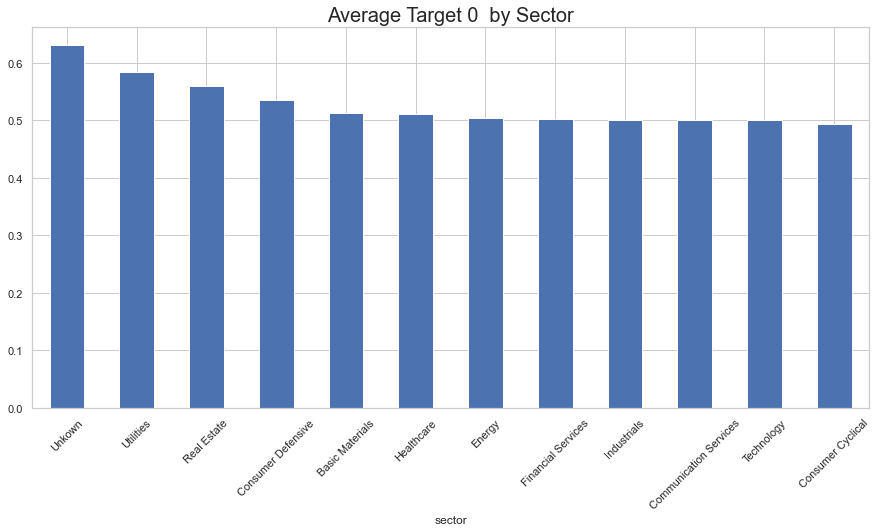

In [176]:
sns.set_style('whitegrid')
(df_model.groupby('sector').mean()['Target_0'].sort_values(ascending=False) ).plot.bar(figsize=(15,7))
plt.xticks(rotation=45)
plt.title('Average Target 0  by Sector', fontsize=20)

### Import Target data from BQ 

In [17]:
query = """
SELECT fn.symbol,fn.date,  fn.fillingDate,tg.close,tg.indexPrice,
      tg.futDate,tg.futstockPrice,tg.futindexPrice,tg.stockQuarterlyReturns,
      tg.indexQuarterlyReturns, tg.stdStock,
      tg.stdIndex, tg.correlation,tg.beta,
      tg.futAlpha
FROM `stockmarket-v0.stockMarket_dev.QuarterlyFundamentals` as fn
left join 
            (select tg.symbol as symbols,
                  tg.date as Date_orig,
                  tg.close as close,
                  tg.indexPrice as indexPrice, 
                  lead(tg.date,63) OVER (partition by symbol ORDER BY date ASC) as futDate,
                  lead(tg.close,63) OVER (partition by symbol ORDER BY date ASC) as futstockPrice,
                  lead(tg.indexPrice,63) OVER (partition by symbol ORDER BY date ASC) as futindexPrice,
                  lead(tg.QoQ_stockReturn ,63) OVER (partition by symbol ORDER BY date ASC) as stockQuarterlyReturns,
                  lead(tg.QoQ_indexReturn ,63) OVER (partition by symbol ORDER BY date ASC) as indexQuarterlyReturns,
                  lead(tg.correlation ,63) OVER (partition by symbol ORDER BY date ASC) as correlation,
                  lead(tg.stdStock ,63) OVER (partition by symbol ORDER BY date ASC) as stdStock,
                  lead(tg.stdIndex ,63) OVER (partition by symbol ORDER BY date ASC) as stdIndex,
                  lead(tg.beta ,63) OVER (partition by symbol ORDER BY date ASC) as beta,
                  lead(tg.alpha,63) OVER (partition by symbol ORDER BY date ASC) as futAlpha
            from stockmarket-v0.stockMarket_dev.QuarterlyAlpha as tg) as tg

on fn.symbol = tg.symbols and fn.fillingDate = tg.Date_orig
where  fn.fillingDate>'2010-01-01'
limit 10000
"""
# fn.symbol ='AAPL' or fn.symbol='MSFT' or fn.symbol='TSLA' and
projectID = 'stockmarket-v0'
target_data = pd.read_gbq(query = query,
                          project_id=projectID)

target_data = target_data.loc[(target_data.fillingDate>'2010-01-01') &(target_data.fillingDate<='2023-01-01') ]
target_data = target_data.dropna().sort_values(['fillingDate']).drop(columns = 'date').iloc[:]

#### Generate Target Sample

In [44]:
target_sample_1 = target_data.loc[(target_data['fillingDate']=='2021-03-31') & (target_data['beta']>-0.8)].sample(5,random_state=2)
target_sample_1

target_sample_2 = target_data.loc[(target_data['fillingDate']>='2010-03-31') & (target_data['beta']>-0.8)].sample(5,random_state=0)
target_sample_2 = target_sample_2.sort_values(by='fillingDate')
target_sample_2


full_target_sample = pd.concat([target_sample_1, target_sample_2],axis=0)

target_sample_path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Sample\Target\TargetSample.csv'
# full_target_sample.to_csv(target_sample_path)

,symbol,fillingDate,close,indexPrice,futDate,futstockPrice,futindexPrice,stockQuarterlyReturns,indexQuarterlyReturns,stdStock,stdIndex,correlation,beta,futAlpha
4964,MOMO,2021-03-31,12.517896,3972.889893,2021-06-30,13.550862,4297.5,0.082519,0.081706,0.020868,0.007027,0.204849,0.608373,0.032811
3012,VERY,2021-03-31,9.890000,3972.889893,2021-06-30,9.857000,4297.5,-0.003337,0.081706,0.076681,0.007027,0.105081,1.146727,-0.097031
1056,COHR,2021-03-31,68.370003,3972.889893,2021-06-30,72.589996,4297.5,0.061723,0.081706,0.027946,0.007027,0.473389,1.882739,-0.092109
4601,FBIN,2021-03-31,79.694679,3972.889893,2021-06-30,83.051521,4297.5,0.042121,0.081706,0.014398,0.007027,0.634933,1.301003,-0.064179
5411,HIMX,2021-03-31,11.529660,3972.889893,2021-06-30,14.330581,4297.5,0.242932,0.081706,0.050722,0.007027,0.287317,2.073992,0.073474


In [50]:
df_full_path_skew = r'E:\Database\Reasearch Topic\Long-Term\Data Preparation\Long-Term-CAPM\LongTerm-DataPreparation_Skew.csv'

assess_ = pd.read_csv(df_full_path_skew)

In [57]:
target_sample_2

,symbol,fillingDate,close,indexPrice,futDate,futstockPrice,futindexPrice,stockQuarterlyReturns,indexQuarterlyReturns,stdStock,stdIndex,correlation,beta,futAlpha
5506,NWL,2012-05-09,12.618410,1354.579956,2012-08-08,12.095205,1402.219971,-0.041464,0.035170,0.016491,0.010240,0.727339,1.171330,-0.082659
5538,PII,2013-05-01,67.329193,1582.699951,2013-07-31,90.762978,1685.729980,0.348048,0.065098,0.011380,0.007632,0.554440,0.826661,0.294234
4789,CINF,2015-10-27,48.227669,2065.889893,2016-01-28,46.048306,1893.359985,-0.045189,-0.083514,0.012254,0.011143,0.878726,0.966264,0.035507
4520,TARO,2016-02-02,123.136185,1903.030029,2016-05-03,119.188835,2063.370117,-0.032057,0.084255,0.015378,0.008394,0.274843,0.503500,-0.074479
5836,CAR,2016-11-03,36.490002,2088.659912,2017-02-06,36.840000,2292.560059,0.009592,0.097622,0.027339,0.005104,0.434057,2.324994,-0.217380


In [64]:
assess_.loc[(assess_.symbol=='CAR') & (assess_.fillingDate=='2016-11-03'),'excessReturns']

60265   -0.21738
Name: excessReturns, dtype: float64